In [1]:
%pylab qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gwp(x,xc,pc,alpha,gamma):
    """Gaussian wavepacket in one dimension."""
    
    return (2/pi*real(alpha))**0.25 * exp(-alpha*(x-xc)**2 + 1j*pc*(x-xc) + 1j*gamma)

In [4]:
from qdyn import propagator, animate_dynamics


In [3]:
def V_ground(x):
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te


def V_excited(x):
    de=0.03342
    re=3.03150
    beta=0.19459
    te=0.327
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te

In [4]:
x=np.linspace(0,8,200)
plt.plot(x,V_ground(x))
plt.ylim([0,0.6])

C:\Users\AlbertCielstian\AppData\Local\Temp\ipykernel_10220\1647881167.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te


(0.0, 0.6)

In [5]:
def k_grnd():
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    k_grnd = 2*de*(1/re+2*beta*re)**2
    return k_grnd

In [6]:
from numpy.polynomial.hermite import hermval

def eigen_ho(x,v,m,k):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    
    hermite_sum=zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-x**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * x,hermite_sum) 

In [9]:
m=14583 #reduced mass of O2 in atomic units
dt=10 #time step in atomic units (this is a relatively big step)

x_grid=np.linspace(1,6,500)
psi0 = eigen_ho((x_grid-2.29716),0,m,k_grnd())
new_wf=propagator((x_grid-2.29716),psi1,m,dt,V_ground)


plt.plot(x_grid,psi0)
plt.plot(x_grid,V_ground(x_grid))

NameError: name 'psi1' is not defined

In [181]:
dt=0.001
nsteps=500

x_grid=np.linspace(1,6,500)
psi0=eigen_ho((x_grid-2.29716),5,m,k_grnd())

wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))

In [93]:
trapz(wf_dynamics[0],wf_dynamics[0])

(-2.3697074988954016e-54+0j)

In [ ]:
conj(wf_dynamics[0])*wf_dynamics

In [7]:
import numpy as np

def TDM(x):
    '''Transition dipole moment dependence on the inter-atomic
    coordinate x for the O2 electronic transition.
    The input x, and the output of the function are in atomic units.'''

    #parameters for connecting function
    ss=2
    es=2.28
    plateau=0.266
    peak=0.94

    #step function of order 7 (n=3)
    xs=(x-ss)/(es-ss)
    step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
    step= plateau + (peak-plateau)*step

    #exponential decay for higher x values
    decay=3.85*np.exp(-0.626*x)

    return np.where(x<ss,plateau,np.where(x>es,decay,step))

In [33]:
m=14583 #reduced mass of O2 in atomic units
dt=1
nsteps=500

x_grid=np.linspace(1,6,500)

wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

    
animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))


In [1]:
m=14583 #reduced mass of O2 in atomic units
dt=0.00001
nsteps=50000

x_grid=np.linspace(1,6,500)

psi0=eigen_ho((x_grid-2.29716),0,m,k_grnd())
wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=psi0

for step in range(nsteps):
    psi=propagator((x_grid-2.29716),wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi

    

psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())
wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-2.29716),wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi    
    
#animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))



autocor_int = trapz(conj(wf_dynamics[0])*wf_dynamics_exi[1:],x_grid)



# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(autocor_int,norm="ortho")) 
spec = (2*pi)**(3/2)/(3*137.037)*gauss_w * TDM(2.29716)**2



# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2 * pi * fftshift(fftfreq(nsteps,d=dt))

spec_frq = spec*frequency

plot(frequency,abs(spec_frq)) # Plot the transformed function
xlim([0,1500])
show()

NameError: name 'np' is not defined

In [73]:
def V_harm(x,x0,k):
    "Harmonic oscillator"
    return k/2*(x-x0)**2

m=14583 #reduced mass of O2 in atomic units
dt=0.1
nsteps=5000

x_grid=np.linspace(1,5.5,1000)


psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())
wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-3.03150),wf_dynamics_exi[step],m,dt,V_harm,3.03150,k_grnd())
    wf_dynamics_exi[step+1]=psi_exi    
    
animate_dynamics(x_grid,wf_dynamics_exi,dt,V_harm(x_grid,3.03150,k_grnd()))

In [69]:
# Final version


m=14583 #reduced mass of O2 in atomic units
dt=0.001
nsteps=50000

x_grid=np.linspace(1,5.5,1200)

psi0=eigen_ho((x_grid-2.29716),0,m,k_grnd())
psi0_exi=eigen_ho((x_grid-3.03150),0,m,k_grnd())

wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=psi0_exi

for step in range(nsteps):
    psi_exi=propagator((x_grid-2.29716),wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi    
    
#animate_dynamics(x_grid,wf_dynamics,dt,V_ground(x_grid))



autocor_int = trapz(conj(psi0)*wf_dynamics_exi[1:],x_grid)



# Obtain the inverse Fourier transform of gauss_t. Note that the values are shifted by fftshit()
gauss_w=ifftshift(ifft(autocor_int,norm="ortho")) 
spec = (2*pi)**(3/2)/(3*137.037)*gauss_w * TDM(2.29716)**2



# Obtain the grid of frequency values. The d keyword specifies the spacing between time points.
frequency=2 * pi * fftshift(fftfreq(nsteps,d=dt))

spec_frq = spec*frequency


plot(frequency,abs(spec_frq)) # Plot the transformed function
xlim([0,1000])
show()

In [67]:
plot(abs(autocor_int))


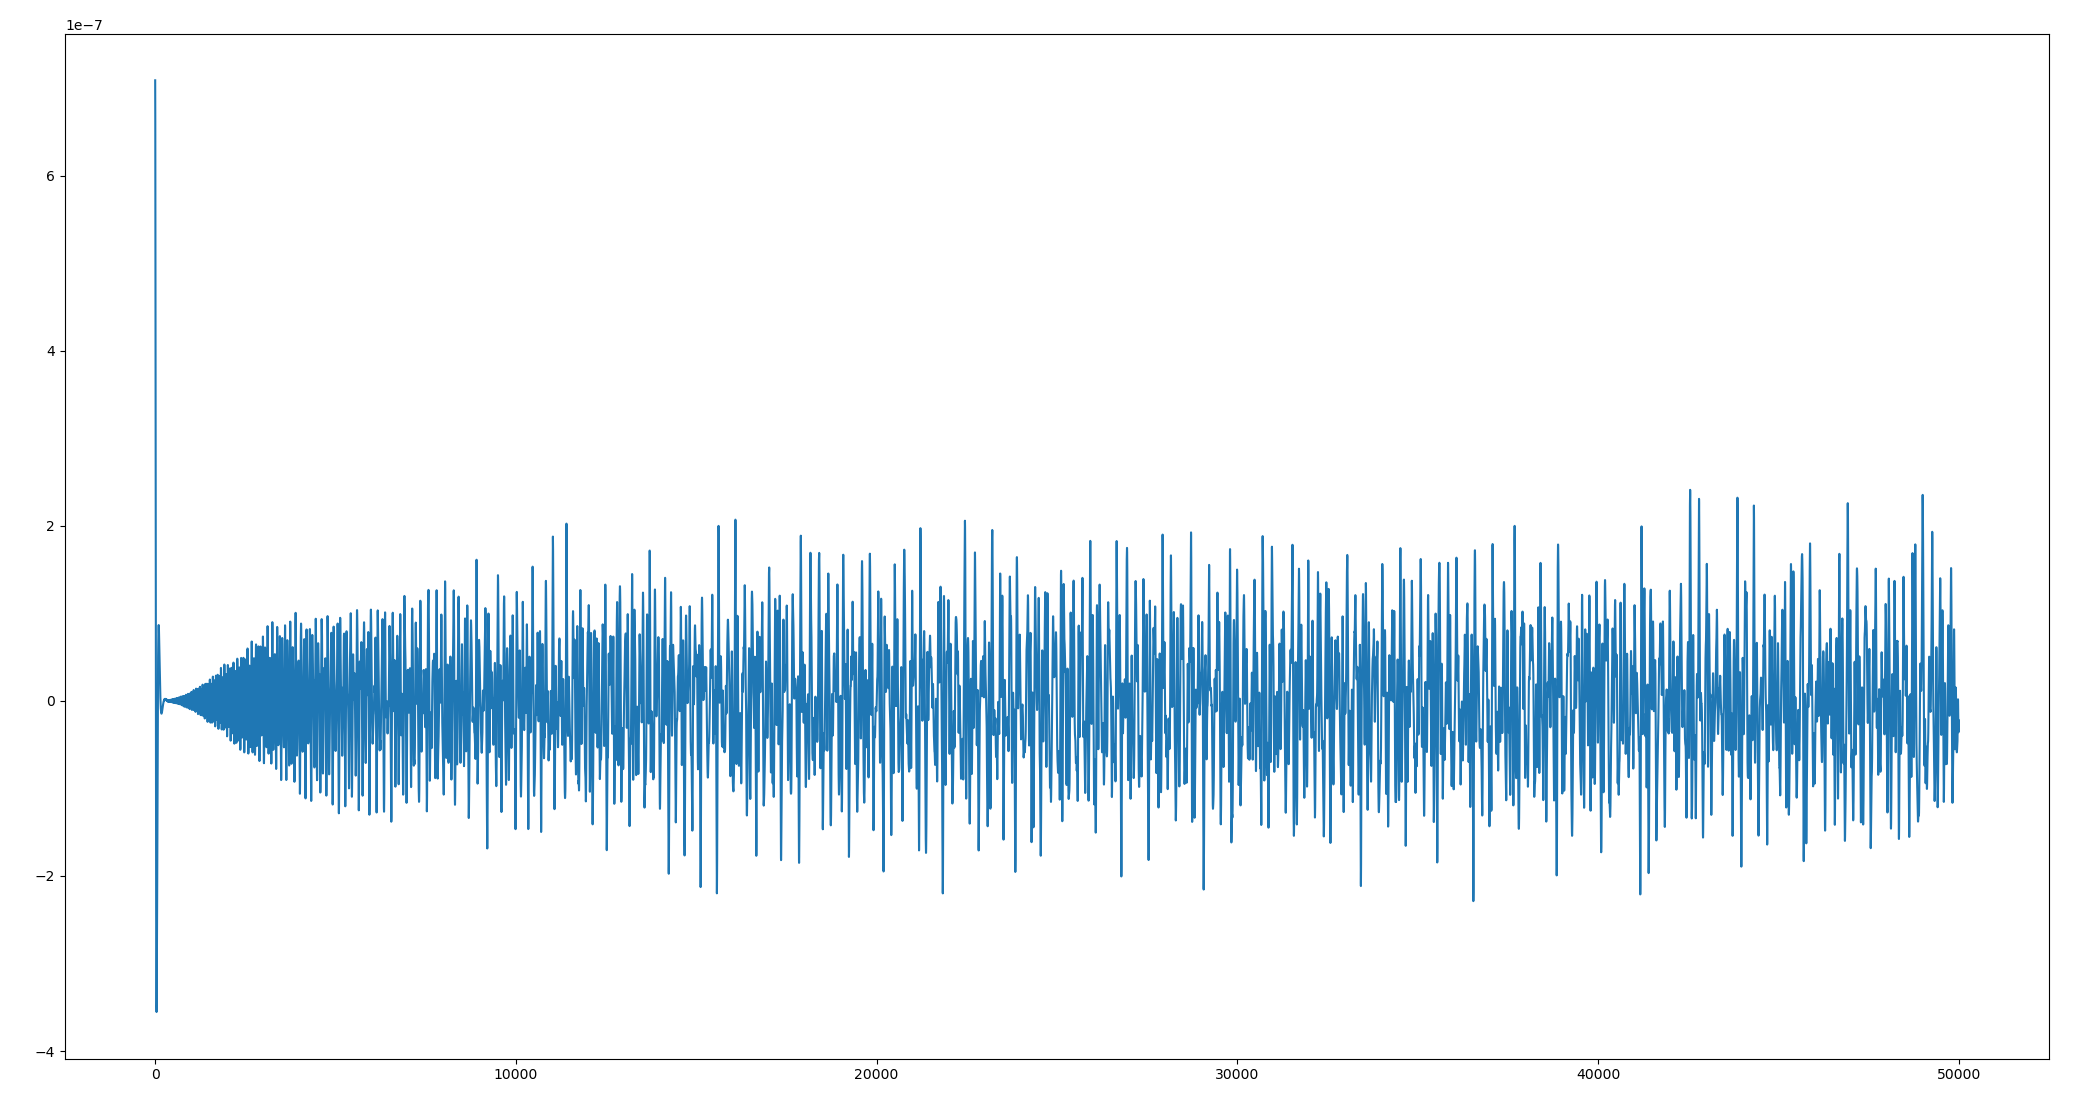

In [62]:
plot(frequency,abs(spec_frq)) # abs spectrum
plot(frequency,abs(gauss_w)) #power spectrum
plot(frequency,abs(gauss_w * TDM(2.29716)**2)) 



xlim([0,400])

(0.0, 400.0)

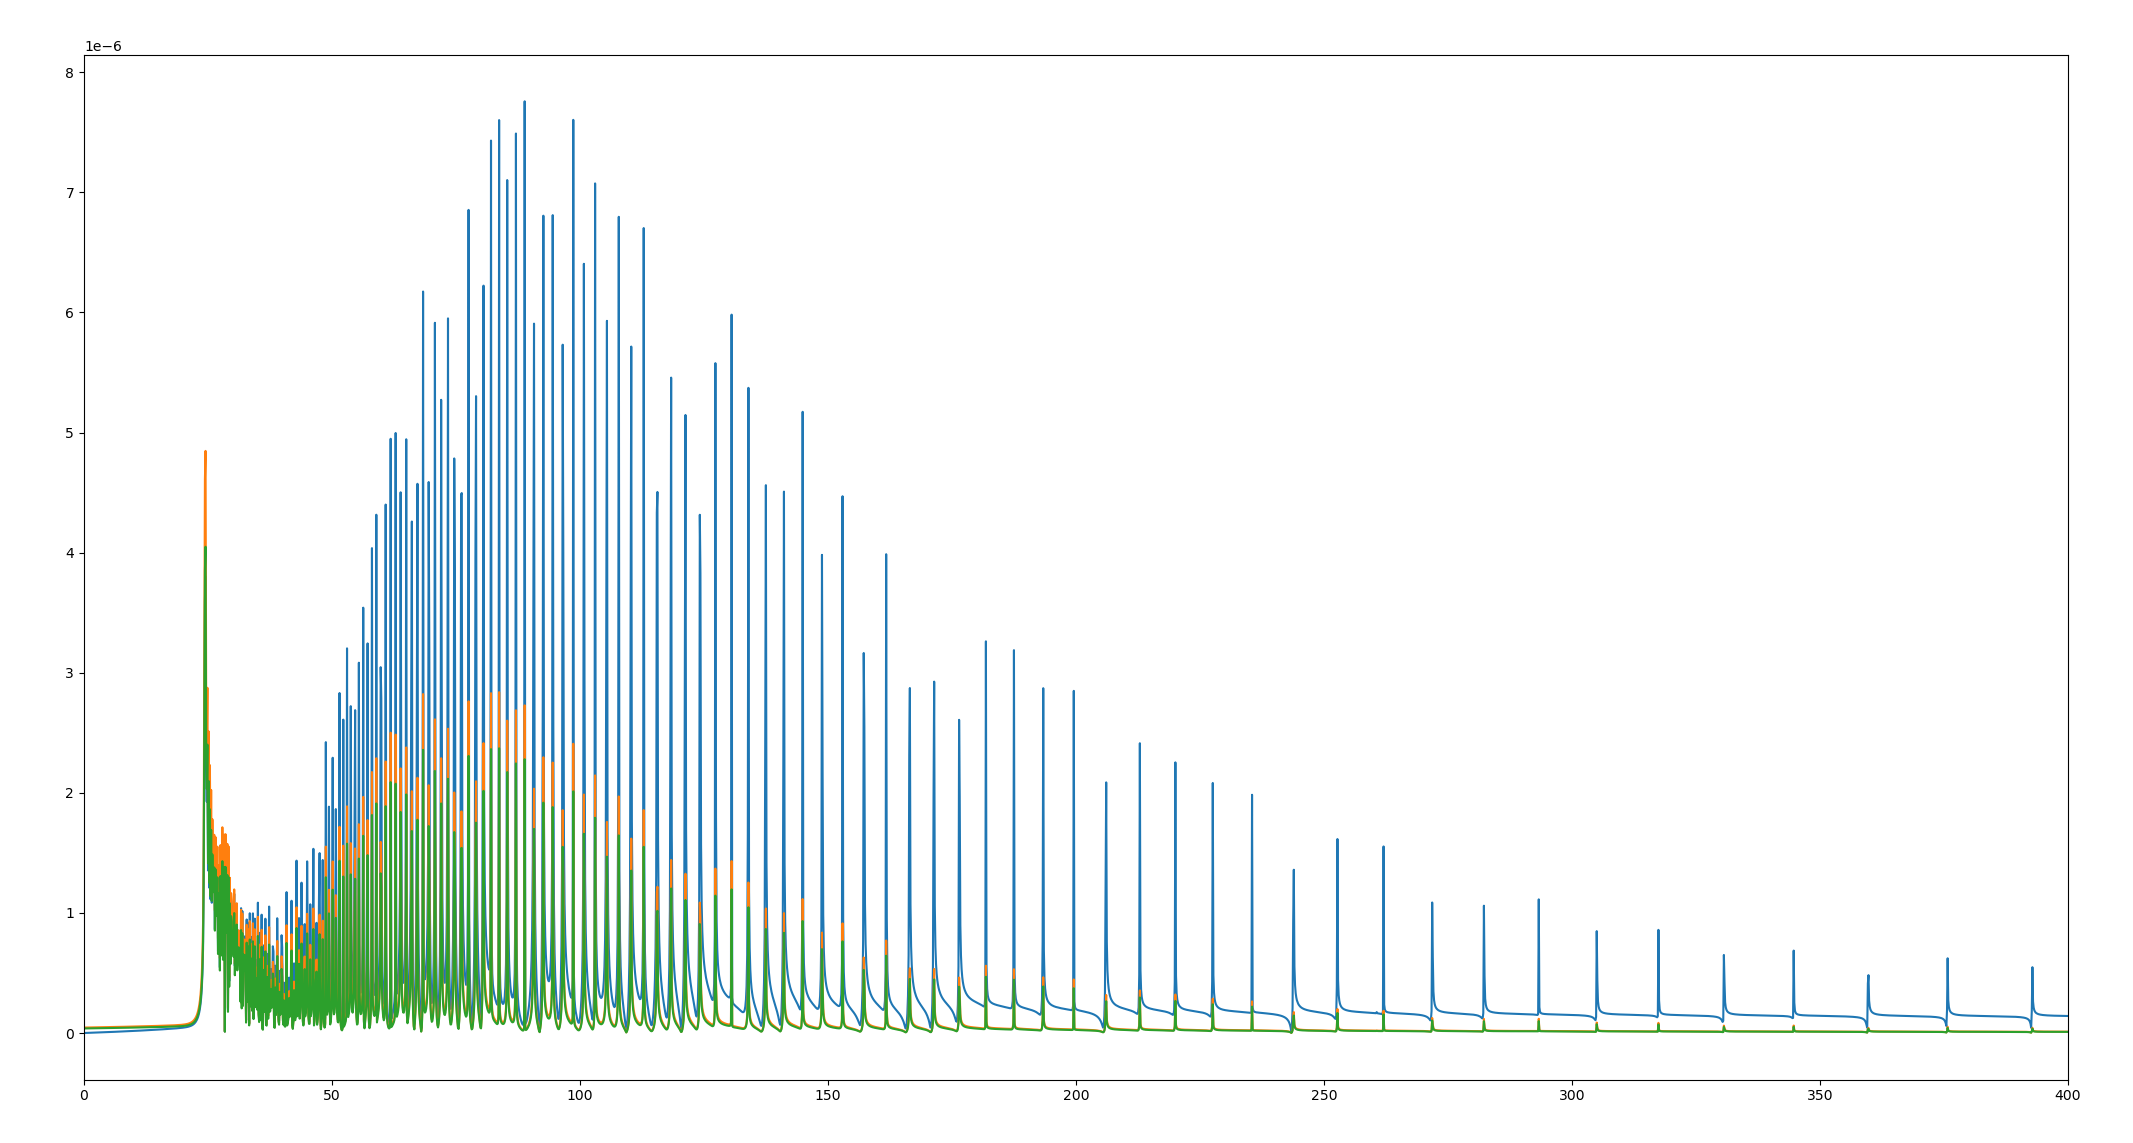

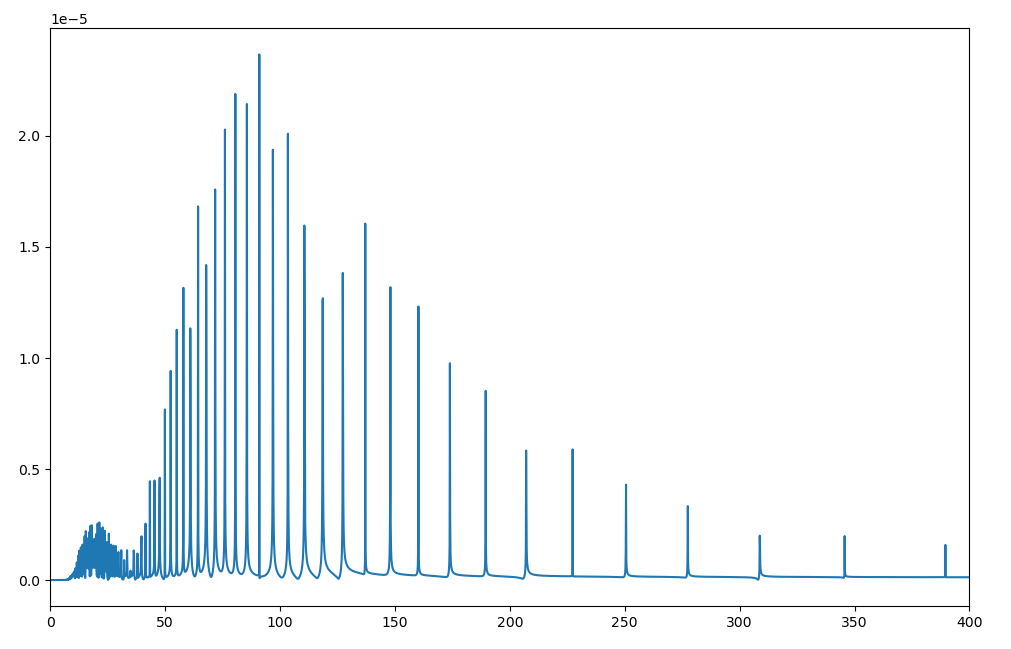

In [ ]:
dt=0.001
nsteps=50000

x_grid=np.linspace(1,5.5,500)

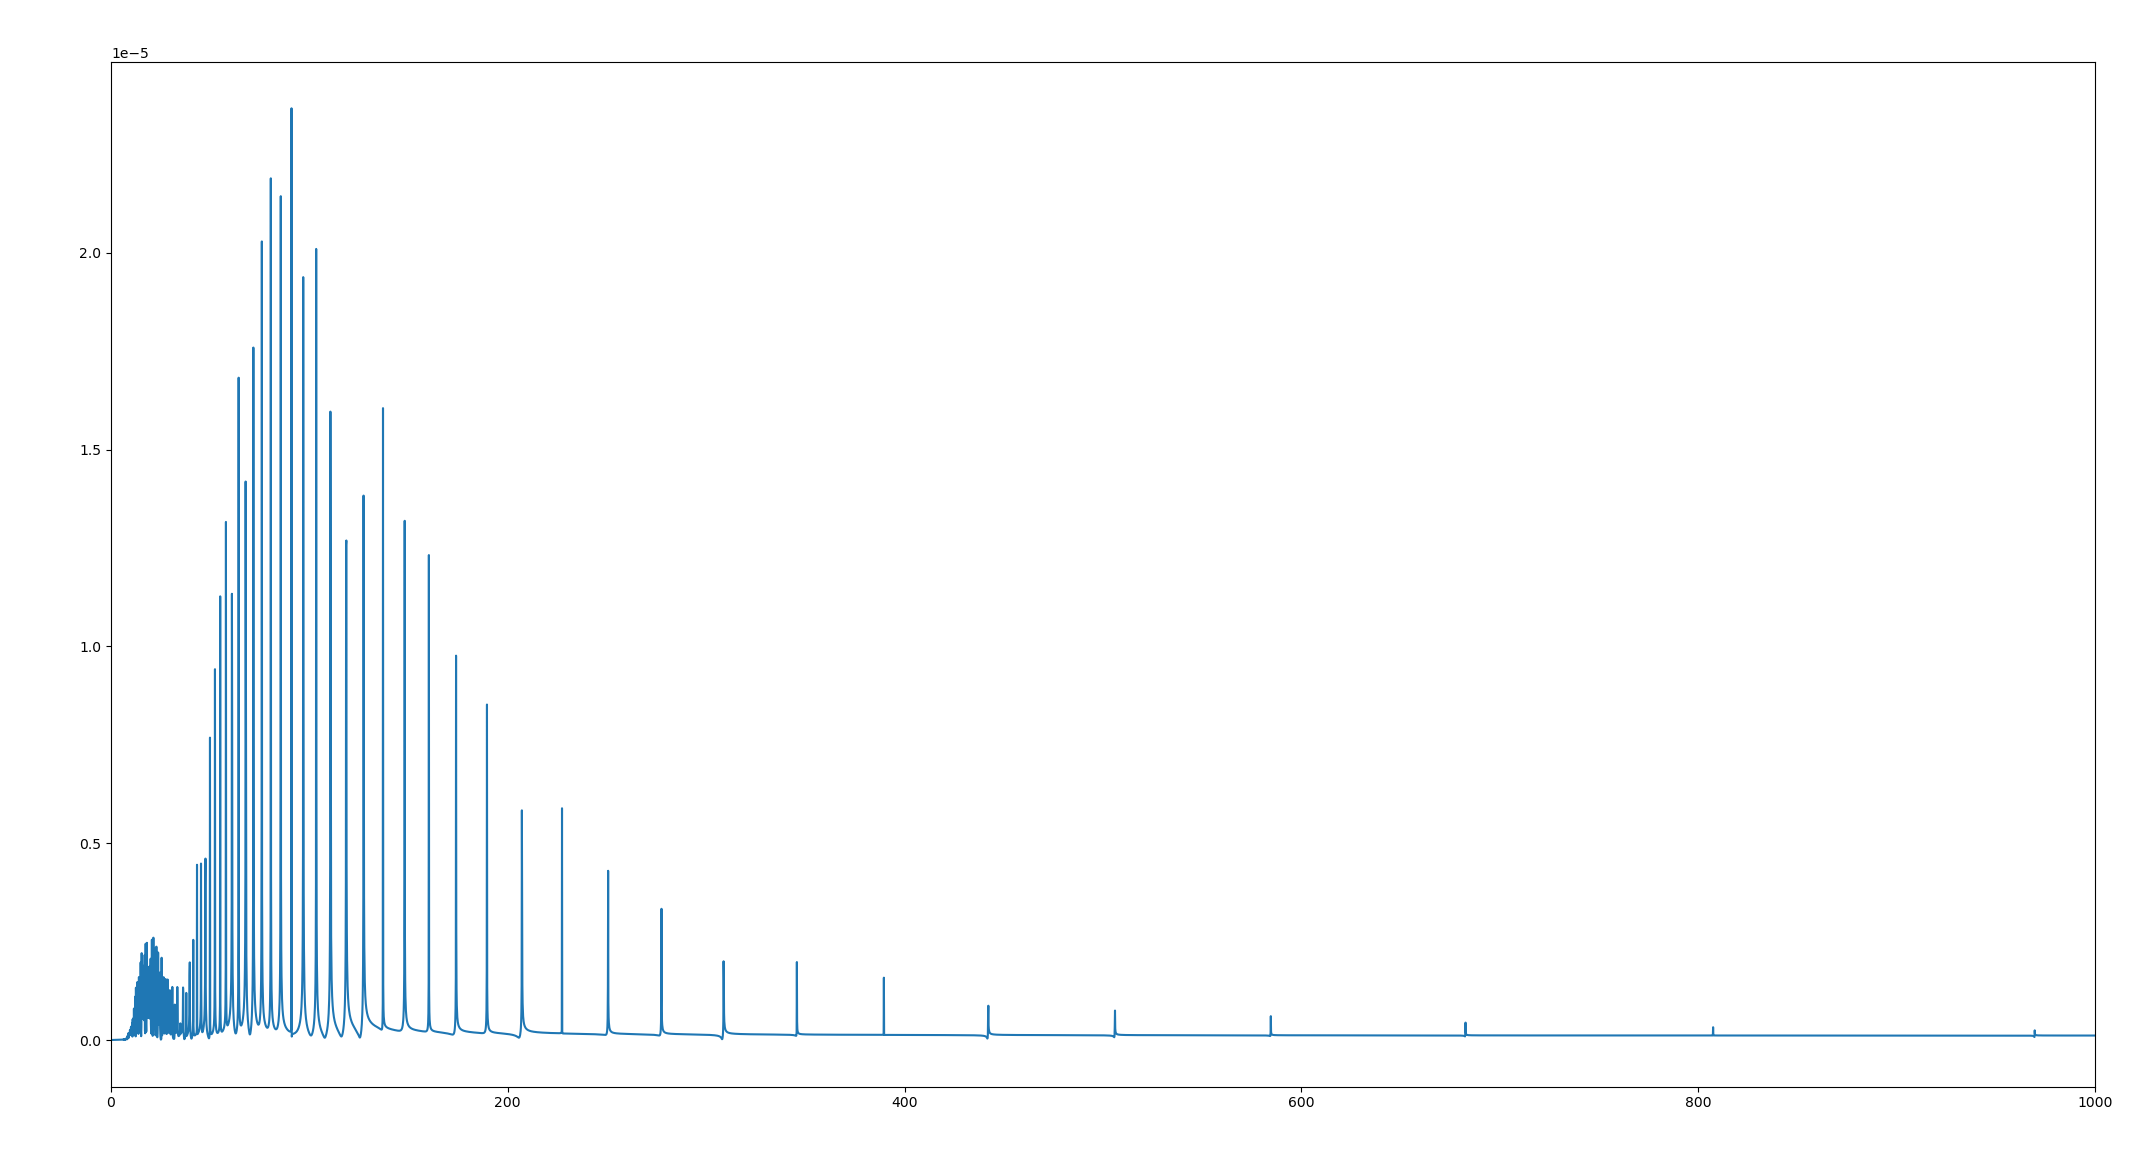